### Terse Summary of Problem
why does the model fail to score well on the *same* validation data loaded in the *same* way?


In [20]:
from fastai2.vision.all import *

def piece_class_parse(fn): 
    fn = fn.split('_')[1]
    fn = fn.split('.')[0]
    return fn

path = Path('../../../rf-chess-data/cropped_v1/')

In [21]:
pieces = ImageDataLoaders.from_name_func(
                path, 
                get_image_files(path),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                )

In [22]:
learn = cnn_learner(pieces, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.533508,0.196723,0.054007,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.338460,0.115521,0.013937,00:04
1,0.242139,0.094110,0.010453,00:04
2,0.188779,0.102675,0.012195,00:04
3,0.137365,0.096918,0.010453,00:04


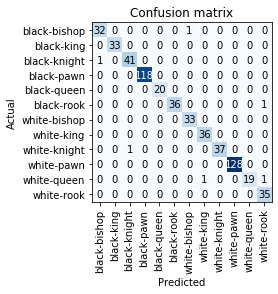

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Good: arg `dl` allows scoring on another dataset, not connected to `learn`
In this case we use the same dataset, `pieces`, specifically the validation set via `pieces.valid`. But this shows `ClassificationInterpretation` works the way we want it to.

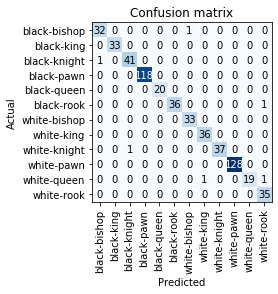

In [24]:
interp2 = ClassificationInterpretation.from_learner(
                                learn=learn, 
                                dl=pieces.valid) 

interp2.plot_confusion_matrix()

##### Load the same dataset, in the exact same way, to a different variable, `pieces2`

In [25]:
pieces2 = ImageDataLoaders.from_name_func(
                path, 
                get_image_files(path),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                )

### Bad: now the model is not very predictive
when we score on `pieces2.valid`

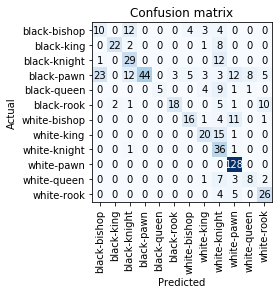

In [26]:
interp3 = ClassificationInterpretation.from_learner(
                                learn=learn, 
                                dl=pieces2.valid) 

interp3.plot_confusion_matrix()

### Final Sanity Checks

In [27]:
pieces2.valid.items == pieces.valid.items

True